In [3]:
import torch
import torch.nn as nn
import pickle
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

from dynamic_reparameterization.DynamicReparameterizationNet import DynamicReparameterizationNet

In [4]:
with open('data/duffing/duffing_dataset.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('data/duffing/duffing_dataset_test.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [5]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [21]:
model = DynamicReparameterizationNet(n_inputs=3, hidden_layers=[(10, 10), (10, 10)], n_outputs=2, H=0.2, sparsity=0.5, Np=100, fractional_tolerence=0.1)

In [22]:
model.train_n_epochs(train_loader, n_epochs=5000, lr=0.001, weight_decay=0.0001, epochs_reallocate=500)

Epoch 0: 0.6567360162734985
Sparsity: 0.5199999809265137 

Epoch 100: 0.5408849716186523
Sparsity: 0.5199999809265137 

Epoch 200: 0.8300973773002625
Sparsity: 0.5199999809265137 

Epoch 300: 0.7617924809455872
Sparsity: 0.5199999809265137 

Epoch 400: 0.6938839554786682
Sparsity: 0.5199999809265137 

Epoch 500: 0.6985511779785156
Sparsity: 0.5199999809265137 

Epoch 600: 1.1319111585617065
Sparsity: 0.03200000524520874 

Epoch 700: 1.0413094758987427
Sparsity: 0.03200000524520874 

Epoch 800: 0.8552155494689941
Sparsity: 0.03200000524520874 

Epoch 900: 0.7998596429824829
Sparsity: 0.03200000524520874 

Epoch 1000: 0.9585296511650085
Sparsity: 0.03200000524520874 

Epoch 1100: 1.005496859550476
Sparsity: 0.8479999899864197 

Epoch 1200: 1.0685142278671265
Sparsity: 0.8479999899864197 

Epoch 1300: 0.7795490622520447
Sparsity: 0.8479999899864197 

Epoch 1400: 1.0229958295822144
Sparsity: 0.8479999899864197 

Epoch 1500: 0.7374376058578491
Sparsity: 0.8479999899864197 

Epoch 1600: 0.88

In [24]:
y_pred = model(test_loader.dataset.x)

In [25]:
torch.sum((y_pred - test_loader.dataset.y)**2) / len(test_loader.dataset.y)

tensor(1.9993, grad_fn=<DivBackward0>)

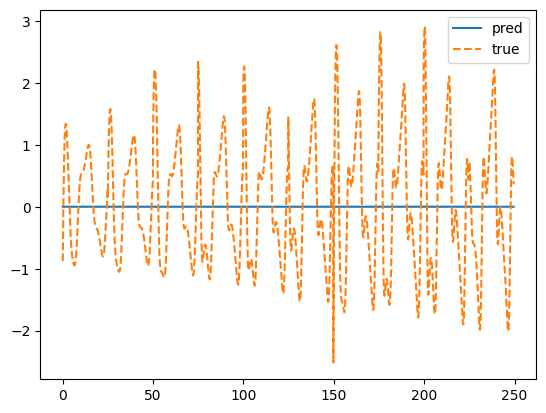

In [26]:
plt.plot(t_test, y_pred[:, 0].detach().numpy(), label='pred')
plt.plot(t_test, test_loader.dataset.y[:, 0].detach().numpy(), label='true', linestyle='--')
plt.legend()

In [27]:
model.get_layerwise_sparsity()

[tensor(0.5333), tensor(0.), tensor(0.), tensor(0.5000)]